In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

FILE_NAME = '../2019-05-11 121314.txt'

In [2]:
X, y = [], []

def encode_field(field):
    if field == 0:
        return [1, 0, 0]
    elif field == -1:
        return [0, 1, 0]
    else:
        return [0, 0, 1]

with open(FILE_NAME) as file:
    for line in file:
        line = line.strip()
        line_split = list(map(int, line.split(' ')))
        
        board = [encode_field(field) for field in line_split[:64]]
        
        N = sum(line_split[64:67])
        black_prob = line_split[64] / N
        
        X.append(board)
        y.append(black_prob)
        
X = np.array(X)
y = np.array(y)

X = X.reshape(-1, 8, 8, 3)
print(X.shape)

(10000, 8, 8, 3)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
def get_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(192,)))
    model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    # model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='relu'))
    
    return model

def get_model2():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(16, kernel_size=(3, 3),
                            activation='relu',
                            padding='same',
                            input_shape=(8, 8, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='relu'))
    
    return model

Train on 6400 samples, validate on 1600 samples
Epoch 1/1000
6400/6400 [==============================] - 1s 79us/sample - loss: 0.0551 - mean_absolute_error: 0.1814 - val_loss: 0.0311 - val_mean_absolute_error: 0.1318
Epoch 2/1000
6400/6400 [==============================] - 0s 61us/sample - loss: 0.0360 - mean_absolute_error: 0.1454 - val_loss: 0.0257 - val_mean_absolute_error: 0.1187
Epoch 3/1000
6400/6400 [==============================] - 0s 67us/sample - loss: 0.0300 - mean_absolute_error: 0.1307 - val_loss: 0.0232 - val_mean_absolute_error: 0.1132
Epoch 4/1000
6400/6400 [==============================] - 0s 60us/sample - loss: 0.0265 - mean_absolute_error: 0.1221 - val_loss: 0.0206 - val_mean_absolute_error: 0.1054
Epoch 5/1000
6400/6400 [==============================] - 0s 66us/sample - loss: 0.0239 - mean_absolute_error: 0.1160 - val_loss: 0.0191 - val_mean_absolute_error: 0.1016
Epoch 6/1000
6400/6400 [==============================] - 0s 61us/sample - loss: 0.0225 - mean_ab

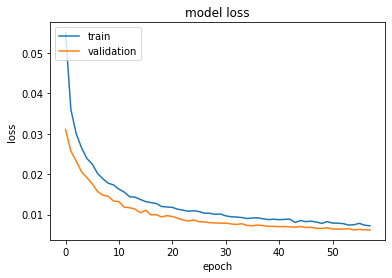

2000/2000 [==============================] - 0s 145us/sample - loss: 0.0064 - mean_absolute_error: 0.0570


[0.00638914006575942, 0.056989707]

In [10]:
model = get_model2()
model.compile(optimizer=tf.train.AdamOptimizer(0.0003),
              loss='mse',
              metrics=['mae']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience=3,
        monitor='val_loss'
    )
]

history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model.evaluate(X_test, y_test)

# tf.contrib.saved_model.save_keras_model(model, "./saved_models")

In [7]:
numer = 427

print(model.predict(X_test)[numer])
print(y_test[numer])

[0.22897063]
0.2433


In [8]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['conv2d_input',
 'conv2d/kernel/Initializer/random_uniform/shape',
 'conv2d/kernel/Initializer/random_uniform/min',
 'conv2d/kernel/Initializer/random_uniform/max',
 'conv2d/kernel/Initializer/random_uniform/RandomUniform',
 'conv2d/kernel/Initializer/random_uniform/sub',
 'conv2d/kernel/Initializer/random_uniform/mul',
 'conv2d/kernel/Initializer/random_uniform',
 'conv2d/kernel',
 'conv2d/kernel/IsInitialized/VarIsInitializedOp',
 'conv2d/kernel/Assign',
 'conv2d/kernel/Read/ReadVariableOp',
 'conv2d/bias/Initializer/zeros',
 'conv2d/bias',
 'conv2d/bias/IsInitialized/VarIsInitializedOp',
 'conv2d/bias/Assign',
 'conv2d/bias/Read/ReadVariableOp',
 'conv2d/dilation_rate',
 'conv2d/Conv2D/ReadVariableOp',
 'conv2d/Conv2D',
 'conv2d/BiasAdd/ReadVariableOp',
 'conv2d/BiasAdd',
 'conv2d/Relu',
 'max_pooling2d/MaxPool',
 'dropout/keras_learning_phase/input',
 'dropout/keras_learning_phase',
 'dropout/cond/Switch',
 'dropout/cond/switch_t',
 'dropout/cond/switch_f',
 'dropout/cond/pred_id'